In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

M : having memory
I : Iterative training(fine tuning over time)
D : having Deviation_score
B : having Blending
O : means nothing(normal GNN)


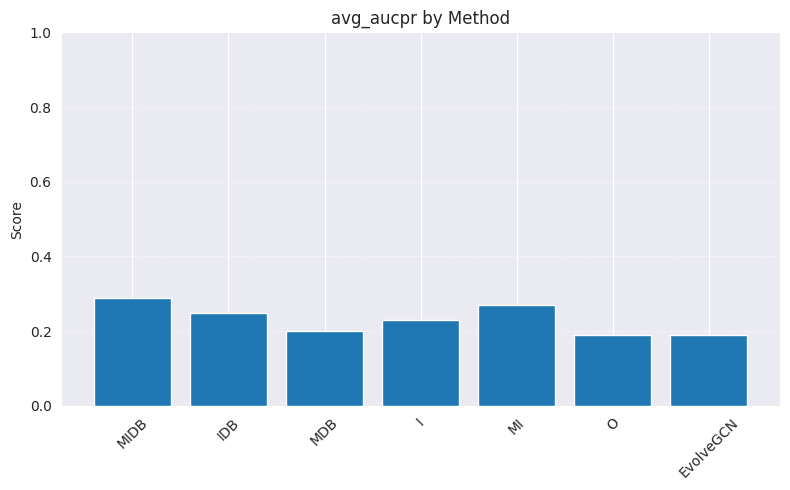

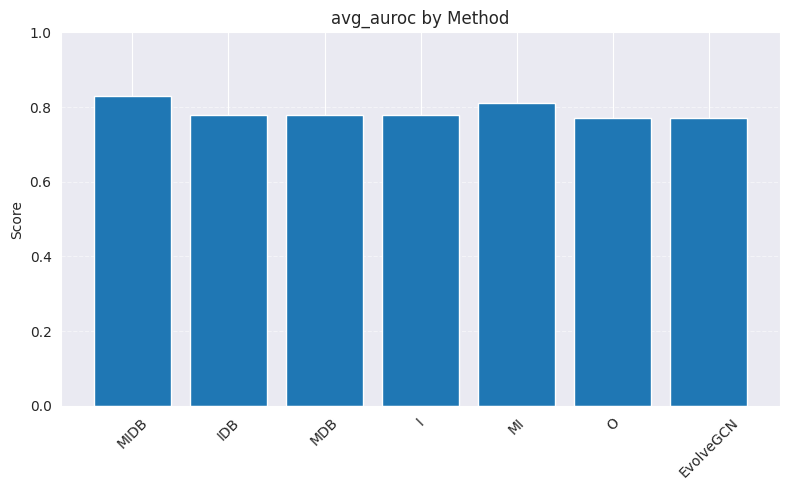

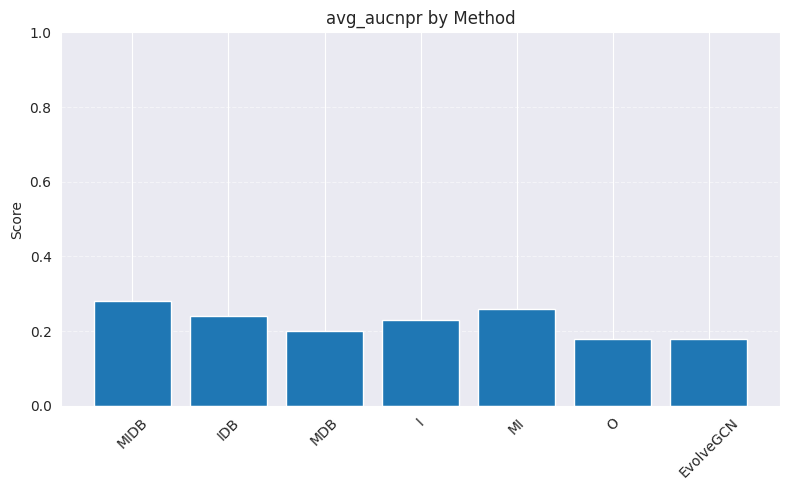

In [4]:
## EllipticPP
data = {
    'MIDB': (0.29, 0.83, 0.28),
    'IDB': (0.25, 0.78, 0.24),
    'MDB': (0.20, 0.78, 0.20),
    'I': (0.23, 0.78, 0.23),
    'MI': (0.27, 0.81, 0.26),
    'O': (0.19, 0.77, 0.18),
    # 'Roland': (0.23, 0.82, 0.22),
    'EvolveGCN': (0.19, 0.77, 0.18)
}
df = pd.DataFrame.from_dict(data, orient='index', columns=['avg_aucpr', 'avg_auroc', 'avg_aucnpr'])
df.index.name = 'method'
df = df.reset_index()

metrics = ['avg_aucpr', 'avg_auroc', 'avg_aucnpr']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    df_plot = df[['method', metric]].dropna()
    plt.bar(df_plot['method'], df_plot[metric])
    plt.title(f'{metric} by Method')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_279566/1221194320.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


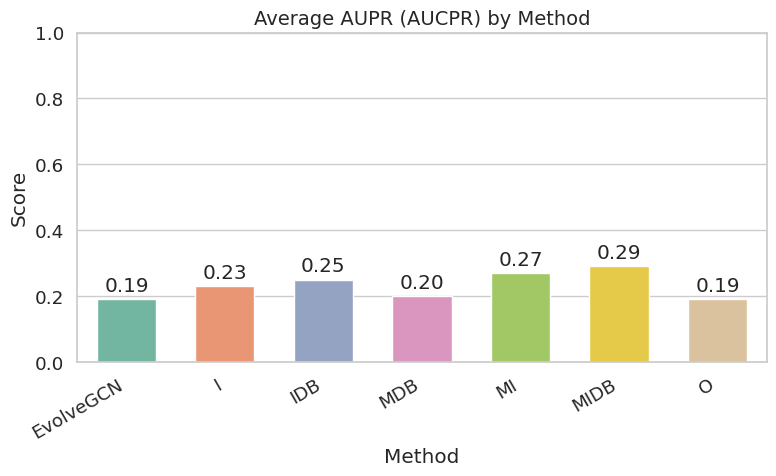

/tmp/ipykernel_279566/1221194320.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


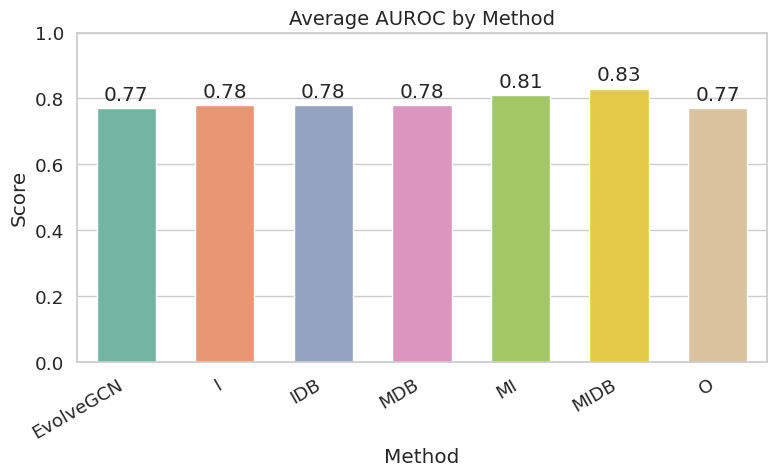

/tmp/ipykernel_279566/1221194320.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


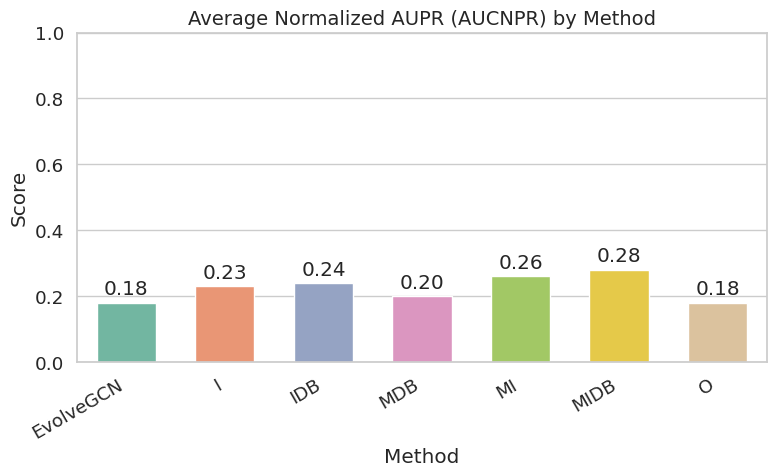

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data
data = {
    'MIDB': (0.29, 0.83, 0.28),
    'IDB': (0.25, 0.78, 0.24),
    'MDB': (0.20, 0.78, 0.20),
    'I': (0.23, 0.78, 0.23),
    'MI': (0.27, 0.81, 0.26),
    'O': (0.19, 0.77, 0.18),
    'EvolveGCN': (0.19, 0.77, 0.18),
}
df = pd.DataFrame.from_dict(data, orient='index', columns=['avg_aucpr', 'avg_auroc', 'avg_aucnpr'])
df.index.name = 'method'
df = df.reset_index()

df = df.sort_values('method', key=lambda s: s.str.lower()).reset_index(drop=True)

metrics = ['avg_aucpr', 'avg_auroc', 'avg_aucnpr']
metric_titles = {
    'avg_aucpr': 'Average AUPR (AUCPR) by Method',
    'avg_auroc': 'Average AUROC by Method',
    'avg_aucnpr': 'Average Normalized AUPR (AUCNPR) by Method',
}

# Seaborn style for publication
sns.set_theme(style="whitegrid", font_scale=1.2)

saved_files = []
for metric in metrics:
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        data=df,
        x="method",
        y=metric,
        palette="Set2"
    )
    # Adjust bar width and spacing manually
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - 0.6  # shrink bars to 0.6 width
        patch.set_width(0.6)
        patch.set_x(patch.get_x() + diff * 0.5)

    ax.set_title(metric_titles[metric], fontsize=14)
    ax.set_ylabel("Score")
    ax.set_xlabel("Method")
    ax.set_ylim(0, 1)
    plt.xticks(rotation=30, ha="right")

    # Annotate bars with values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height:.2f}",
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3), textcoords='offset points')

    plt.tight_layout()
    # outpath = f"/mnt/data/ellipticpp_{metric}_seaborn.png"
    # plt.savefig(outpath, dpi=300, bbox_inches="tight")
    # saved_files.append(outpath)
    plt.show()


# Ploting performance for different model GPU number of parameters

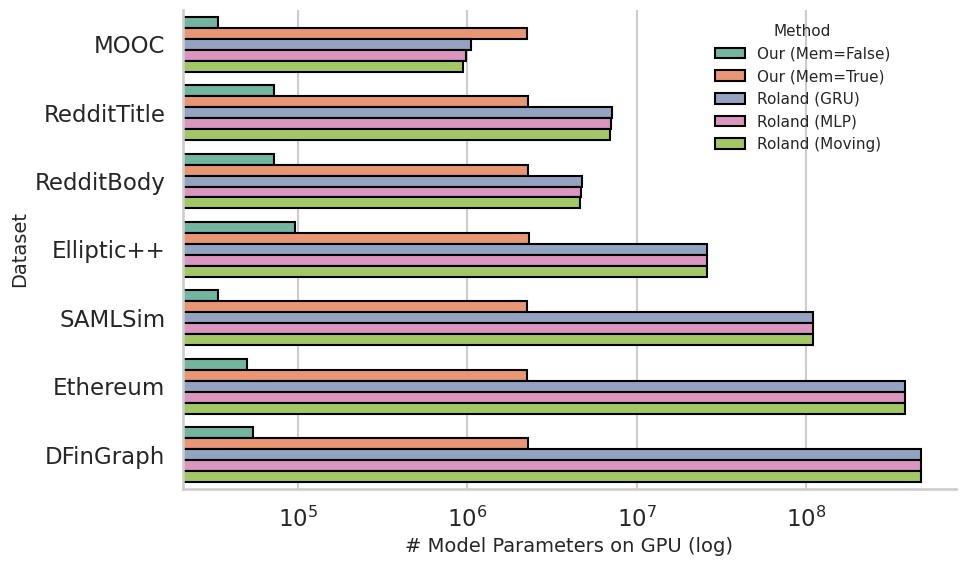

In [19]:
# Data with renamed datasets
data = {
    "Dataset": [
        "RedditTitle", "RedditBody", "Elliptic++",
        "MOOC", "SAMLSim", "DFinGraph", "Ethereum"
    ],
    "Our (Mem=False)": [72239, 72239, 96644, 33803, 33935, 54404, 50308],
    "Our (Mem=True)": [2284975, 2284975, 2309380, 2246539, 2246671, 2267140, 2263044],
    "Roland (GRU)": [7092569, 4750297, 26114563, 1047047, 109631561, 473804931, 380739075],
    "Roland (MLP)": [7026393, 4684121, 26048387, 980871, 109565385, 473738755, 380672899],
    "Roland (Moving)": [6993497, 4651225, 26015491, 947975, 109532489, 473705859, 380640003]
}
df = pd.DataFrame(data)

# Melt into tidy format
df_melted = df.melt(id_vars="Dataset", var_name="Method", value_name="Params")

# Correct dataset order (Ethereum before DFinGraph)
dataset_order = ["MOOC", "RedditTitle", "RedditBody", "Elliptic++", "SAMLSim", "Ethereum", "DFinGraph"]
df_melted["Dataset"] = pd.Categorical(df_melted["Dataset"], categories=dataset_order, ordered=True)

# Plot
sns.set(style="whitegrid", context="talk")
palette = sns.color_palette("Set2", n_colors=len(df_melted["Method"].unique()))
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=df_melted,
    y="Dataset",
    x="Params",
    hue="Method",
    palette=palette,
    ax=ax,
    edgecolor="black"
)

ax.set_xscale("log")
ax.set_xlabel("# Model Parameters on GPU (log)", fontsize=14)
ax.set_ylabel("Dataset", fontsize=14)
ax.legend(
    title="Method",
    fontsize=11,
    title_fontsize=11,
    bbox_to_anchor=(0.67, 1),
    loc="upper left",
    frameon=False
)
sns.despine()

plt.tight_layout()
plt.show()
fig.savefig("GPU_usage.png")